<a href="https://colab.research.google.com/github/HikkaV/DS-ML-Courses/blob/master/parsing_dates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's download landslide dataset from kaggle. Please go to: [kaggle](https://www.kaggle.com/nasa/landslide-events/data) and uppload it mannually and put to collab files.

The first thing we'll need to do is load in the libraries and datasets we'll be using. For today, we'll be working with one dataset containing information on landslides that occured between 2007 and 2016.

In [0]:
# modules we'll use
import pandas as pd # library to work with data
import numpy as np 
import seaborn as sns # library to visualize the data
import datetime # library to work dates

# read in our data
landslides = pd.read_csv("catalog.csv")

# set seed for reproducibility
np.random.seed(0)

**Check the data type of our date column**

I'll be working with the date column from the landslides dataframe. The very first thing I'm going to do is take a peek at the first few rows to make sure it actually looks like it contains dates.

In [29]:
landslides['date'].head()

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object

Yes, those are dates! But just because I, a human, can tell that these are dates doesn't mean that Python knows that they're dates. Pay your attantion that the at the bottom of the output of head(), you can see that it says that the data type of this column is "object".

If you check the pandas dtype documentation [docs](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html), you'll notice that there's also a specific datetime64 dtypes. Because the dtype of our column is object rather than datetime64, we can tell that Python doesn't know that this column contains dates.

**Convert our date columns to datetime**

Now that we know that our date column isn't being recognized as a date, it's time to convert it so that it is recognized as a date. This is called "parsing dates" because we're taking in a string and identifying its component parts.

The basic idea is that you need to point out which parts of the date are where and what punctuation is between them. [There are lots of possible parts of a date](https://strftime.org/), but the most common are %d for day, %m for month, %y for a two-digit year and %Y for a four digit year.

Some examples:

1.   1/17/07 has the format "%m/%d/%y"
2.   17-1-2007 has the format "%d-%m-%Y"

Looking back up at the head of the date column in the landslides dataset, we can see that it's in the format "month/day/two-digit year", so we can use the same syntax as the first example to parse in our dates

In [0]:
# create a new column, date_parsed, with the parsed dates
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format = "%m/%d/%y")

Now when I check the first few rows of the new column, I can see that the dtype is datetime64. I can also see that my dates have been slightly rearranged so that they fit the default order datetime objects (year-month-day).

In [32]:
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

Now that our dates are parsed correctly, we can interact with them in useful ways.

**Plot the day of the month to check the date parsing**

One of the biggest dangers in parsing dates is mixing up the months and days. The to_datetime() function does have very helpful error messages, but it doesn't hurt to double-check that the days of the month we've extracted make sense.

To do this, let's plot a histogram of the days of the month. We expect it to have values between 1 and 31 and, since there's no reason to suppose the landslides are more common on some days of the month than others, a relatively even distribution. (With a dip on 31 because not all months have 31 days.) Let's see if that's the case:

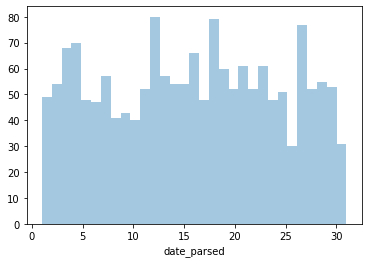

In [34]:
#get day of month from landslised
day_of_month_landslides = landslides['date_parsed'].dt.day
# remove na's
day_of_month_landslides = day_of_month_landslides.dropna()

# plot the day of the month
sns.distplot(day_of_month_landslides, kde=False, bins=31)

Make sense

Now is your turn with earthquakes dataset.

*Hints:*
**What if I run into an error with multiple date formats?** While we're specifying the date format here, sometimes you'll run into an error when there are multiple date formats in a single column. If that happens, you have have pandas try to infer what the right date format should be. You can do that like so:

`landslides['date_parsed'] = pd.to_datetime(landslides['Date'], infer_datetime_format=True)`

**Why don't you always use infer_datetime_format = True?** There are two big reasons not to always have pandas guess the time format. The first is that pandas won't always been able to figure out the correct date format, especially if someone has gotten creative with data entry. The second is that it's much slower than specifying the exact format of the dates.

**Task with a start**

*   How human can be correct in detecting date format?
*   Can we make correct dates from string without specifying format?

Come back here after a while and try to solve this task without build in packages and function but with building your own AI for detecting date format from strings based on NN and Deep Learning.

In [0]:
earthquakes = pd.read_csv("../input/earthquake-database/database.csv")